# Data & Things (RUC F2023)

## Hand-in Exercises for Exam

* This is a template for your exercise solutions. Each solution may use multiple cells. 

* Do your best to make your code clean and clear, e.g., by using comments and markdowns.

* Remeber to fill in the information of all your group members in the following cell.

## Group Members:
* [Rasmus Kjær Nielsen, 68910, rkjaern@ruc.dk]
* [name_2, student number, email_2]
* [Add more if needed]

## 0. Loading of common modules or initialization of other common things, if any

In [1]:
import pandas as pd
import numpy as np
import scratch.deep_learning as dl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import mglearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score

<Figure size 640x480 with 0 Axes>

## 1. EDA and data cleaning (Lecture 2 & 5)

Make an Exploratory Data Analysis (EDA) and data cleaning of the “titanic_survival_data.csv” dataset from Lectures 5 and 6, including dealing with outliers and missing values.

In [2]:
titanic = pd.read_csv("data/titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic["Cabin"].fillna("Unknown", inplace=True)
titanic.dropna(subset=["Age"], inplace=True)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [6]:
titanic["Sex"] = titanic.Sex.replace({'male':0, 'female':1})

### One-Hot Encoding

In [7]:
# Get all possible categories for the "PClass" column
print(f"Possible values for PClass: {titanic['Pclass'].unique()}")

# Use Pandas to One-Hot encode the PClass category
dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass"], drop_first=False)

# Add back in the old Pclass column, for learning purposes
dataset_with_one_hot["Pclass"] = titanic.Pclass

# Print out the first few rows
dataset_with_one_hot.head()

Possible values for PClass: [3 1 2]


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Pclass
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,0,0,1,3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,0,1,3
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,0,0,1,3


Same principle. We convert from cabin number and narrow it down to corresponding deck.

In [8]:
dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass", "Cabin"], drop_first=False)

cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Cabin_"))

print(len(cabin_column_names), "cabins found")

135 cabins found


In [9]:
titanic["Deck"] = [c[0] for c in titanic.Cabin]

print("Decks: ", sorted(titanic.Deck.unique()))

dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass", "Deck"], drop_first=False)

deck_of_cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Deck_"))



Decks:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']


In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,U


## 2. Classification (Lecture 3 & 4)

Combine the exercise from Lecture 3 with exercise 2 from Lecture 4 into one, and construct some classification models to predict if a passenger would survive or not in the Titanic dataset. 

* a) You should have (1) decision tree, (2) random forest, and (3) KNN. You may also vary the configuration of each model type.
* b) You should do necessary data preprocessing (e.g., missing value fill-in, and data scaling if needed for a classifier). 
* c) You should also do cross-validation of your models.
* d) Plot the ROC with AUC for each model you implement.


### Exercises with KNN on Titanic dataset

Now we have handled the data, and filled in the missing values. So now we can do the KNN

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,U


In [12]:
features = titanic.columns.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Deck', 'Embarked', 'PassengerId'])
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
X = titanic[features]
y = titanic['Survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
from sklearn.ensemble import RandomForestClassifier

#criterion='entropy', max_features=5, n_estimators=100, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Accuracy of Random Forest: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of Random Forest: 0.8372093023255814


In [16]:
import numpy as np

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

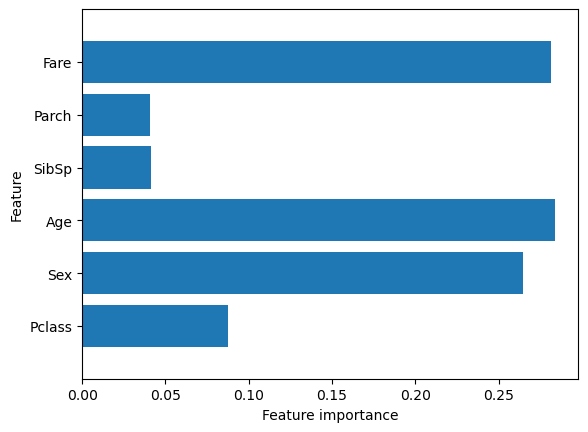

In [17]:
plot_feature_importances(forest, features)

This tells us that the features with most importance towards predicting survival is Fare, Sex and Age.

In [18]:
X = titanic[['Age', 'Fare', 'Sex']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
from sklearn.neighbors import KNeighborsClassifier


def knnRunner(X, y):
    # We create a 2-D array to store all accuracy values
    accuracy_data1 = []
    
    for training_percent in [0.7, 0.8, 0.9]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-training_percent, random_state=1)

        # We crate a 1-D array to store all accuracy values on this split batch
        accuracy_row = []
        
        for k in range(2, 11):
            # Model intializing
            knn = KNeighborsClassifier(n_neighbors=k)

            # Training (very light compared to an eager learner)
            knn.fit(X_train, y_train)

            # Validation/Test
            y_pred = knn.predict(X_test)

            print("KNN with training_percent={}, k={}:\r".format(training_percent, k))
            
            # Get the accuracy from metrics
            accuracy = metrics.accuracy_score(y_test, y_pred)
            print("Accuracy: {}\r\n".format(accuracy))

            accuracy_row.append(accuracy)
            
        accuracy_data1.append(accuracy_row)
    
    return accuracy_data1

Here we see the data without scaling

In [21]:
accuracies_no_scaling = knnRunner(X, y)

KNN with training_percent=0.7, k=2:
Accuracy: 0.6744186046511628

KNN with training_percent=0.7, k=3:
Accuracy: 0.6790697674418604

KNN with training_percent=0.7, k=4:
Accuracy: 0.7023255813953488

KNN with training_percent=0.7, k=5:
Accuracy: 0.7069767441860465

KNN with training_percent=0.7, k=6:
Accuracy: 0.7255813953488373

KNN with training_percent=0.7, k=7:
Accuracy: 0.7209302325581395

KNN with training_percent=0.7, k=8:
Accuracy: 0.6930232558139535

KNN with training_percent=0.7, k=9:
Accuracy: 0.7069767441860465

KNN with training_percent=0.7, k=10:
Accuracy: 0.6976744186046512

KNN with training_percent=0.8, k=2:
Accuracy: 0.6783216783216783

KNN with training_percent=0.8, k=3:
Accuracy: 0.6853146853146853

KNN with training_percent=0.8, k=4:
Accuracy: 0.7062937062937062

KNN with training_percent=0.8, k=5:
Accuracy: 0.6993006993006993

KNN with training_percent=0.8, k=6:
Accuracy: 0.7132867132867133

KNN with training_percent=0.8, k=7:
Accuracy: 0.7062937062937062

KNN with 

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Now with standardscaler

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.describe()

,Age,Fare,Sex
count,7.140000e+02,7.140000e+02,7.140000e+02
mean,2.174187e-16,-5.022437e-17,2.363500e-17
std,1.000701e+00,1.000701e+00,1.000701e+00
min,-2.016979e+00,-6.560759e-01,-7.590513e-01
25%,-6.595416e-01,-5.038498e-01,-7.590513e-01
50%,-1.170488e-01,-3.583992e-01,-7.590513e-01
75%,5.718310e-01,-2.495211e-02,1.317434e+00
max,3.465126e+00,9.032109e+00,1.317434e+00


In [23]:
accuracies_standard_scaling = knnRunner(X_scaled, y)

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

KNN with training_percent=0.7, k=2:
Accuracy: 0.7534883720930232

KNN with training_percent=0.7, k=3:
Accuracy: 0.7534883720930232

KNN with training_percent=0.7, k=4:
Accuracy: 0.772093023255814

KNN with training_percent=0.7, k=5:
Accuracy: 0.786046511627907

KNN with training_percent=0.7, k=6:
Accuracy: 0.7953488372093023

KNN with training_percent=0.7, k=7:
Accuracy: 0.7813953488372093

KNN with training_percent=0.7, k=8:
Accuracy: 0.7534883720930232

KNN with training_percent=0.7, k=9:
Accuracy: 0.7674418604651163

KNN with training_percent=0.7, k=10:
Accuracy: 0.7627906976744186

KNN with training_percent=0.8, k=2:
Accuracy: 0.7622377622377622

KNN with training_percent=0.8, k=3:
Accuracy: 0.7902097902097902

KNN with training_percent=0.8, k=4:
Accuracy: 0.7972027972027972

KNN with training_percent=0.8, k=5:
Accuracy: 0.7692307692307693

KNN with training_percent=0.8, k=6:
Accuracy: 0.7692307692307693

KNN with training_percent=0.8, k=7:
Accuracy: 0.7832167832167832

KNN with tr

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Now with min-max

In [24]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

In [25]:
accuracies_minmax_scaling = knnRunner(X_scaled_mm, y)

KNN with training_percent=0.7, k=2:
Accuracy: 0.7302325581395349

KNN with training_percent=0.7, k=3:
Accuracy: 0.7488372093023256

KNN with training_percent=0.7, k=4:
Accuracy: 0.7627906976744186

KNN with training_percent=0.7, k=5:
Accuracy: 0.7813953488372093

KNN with training_percent=0.7, k=6:
Accuracy: 0.7767441860465116

KNN with training_percent=0.7, k=7:
Accuracy: 0.786046511627907

KNN with training_percent=0.7, k=8:
Accuracy: 0.8

KNN with training_percent=0.7, k=9:
Accuracy: 0.7953488372093023

KNN with training_percent=0.7, k=10:
Accuracy: 0.7767441860465116

KNN with training_percent=0.8, k=2:
Accuracy: 0.7412587412587412

KNN with training_percent=0.8, k=3:
Accuracy: 0.7622377622377622

KNN with training_percent=0.8, k=4:
Accuracy: 0.7832167832167832

KNN with training_percent=0.8, k=5:
Accuracy: 0.7972027972027972



c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

KNN with training_percent=0.8, k=6:
Accuracy: 0.7552447552447552

KNN with training_percent=0.8, k=7:
Accuracy: 0.7832167832167832

KNN with training_percent=0.8, k=8:
Accuracy: 0.7692307692307693

KNN with training_percent=0.8, k=9:
Accuracy: 0.8041958041958042

KNN with training_percent=0.8, k=10:
Accuracy: 0.7692307692307693

KNN with training_percent=0.9, k=2:
Accuracy: 0.8055555555555556

KNN with training_percent=0.9, k=3:
Accuracy: 0.8472222222222222

KNN with training_percent=0.9, k=4:
Accuracy: 0.7916666666666666

KNN with training_percent=0.9, k=5:
Accuracy: 0.8333333333333334

KNN with training_percent=0.9, k=6:
Accuracy: 0.8194444444444444

KNN with training_percent=0.9, k=7:
Accuracy: 0.8194444444444444

KNN with training_percent=0.9, k=8:
Accuracy: 0.7777777777777778

KNN with training_percent=0.9, k=9:
Accuracy: 0.8333333333333334

KNN with training_percent=0.9, k=10:
Accuracy: 0.8055555555555556



c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Now visualized in a graph

In [26]:
columns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
index = ['0.7', '0.8', '0.9']

df_no_scaling = pd.DataFrame(accuracies_no_scaling, columns=columns, index=index).transpose()
df_standard_scaling = pd.DataFrame(accuracies_standard_scaling, columns=columns, index=index).transpose()
df_minmax_scaling = pd.DataFrame(accuracies_minmax_scaling, columns=columns, index=index).transpose()

In [27]:
def plotAccuracy(col):
    import matplotlib.pyplot as plt

    plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
    plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
    plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')

    plt.xlabel('K')
    plt.ylabel('KNN accuracy')
    plt.title('Effect of data scaling on KNN for training data ratio={}'.format(col))

    plt.legend()

C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2969690644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2969690644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2969690644.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')


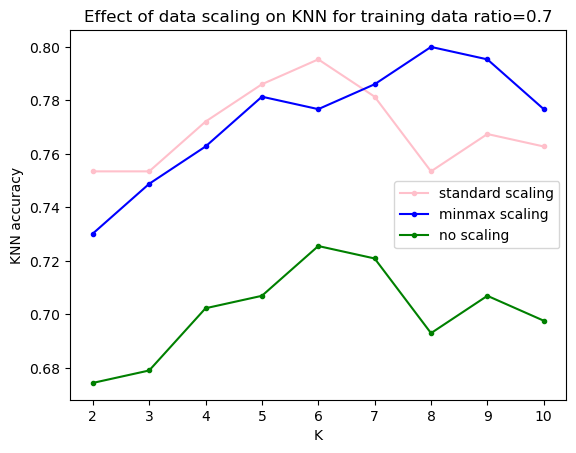

In [28]:
plotAccuracy('0.7')

C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2969690644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2969690644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2969690644.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')


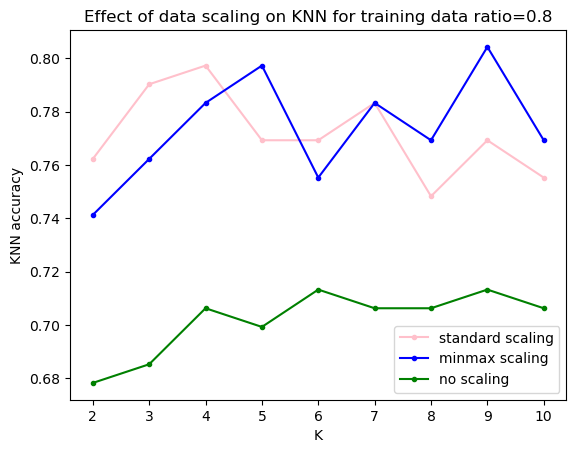

In [29]:
plotAccuracy('0.8')

C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2969690644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2969690644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2969690644.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')


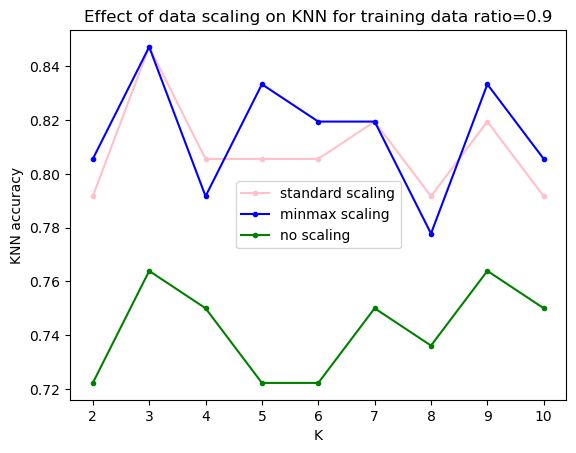

In [30]:
plotAccuracy('0.9')

In [31]:
columns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
index = ['0.7', '0.8', '0.9']

df_standard_scaling = pd.DataFrame(accuracies_standard_scaling, columns=columns, index=index).transpose()

C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2424605476.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling['0.9'], 'b.-', label = '0.9', color='green')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2424605476.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling['0.8'], 'b.-', label = '0.8', color='blue')
C:\Users\rasmu\AppData\Local\Temp\ipykernel_11984\2424605476.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling['0.7'], 'b.-', label = '0.7', color='pink')


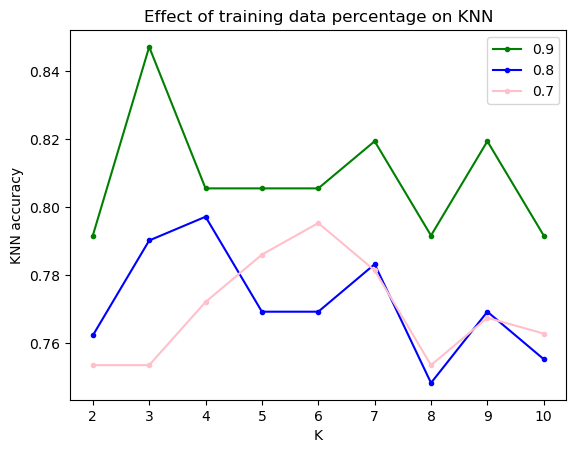

In [32]:
import matplotlib.pyplot as plt

plt.plot(df_standard_scaling.index, df_standard_scaling['0.9'], 'b.-', label = '0.9', color='green')
plt.plot(df_standard_scaling.index, df_standard_scaling['0.8'], 'b.-', label = '0.8', color='blue')
plt.plot(df_standard_scaling.index, df_standard_scaling['0.7'], 'b.-', label = '0.7', color='pink')

plt.xlabel('K')
plt.ylabel('KNN accuracy')
plt.title('Effect of training data percentage on KNN')

plt.legend()

## 3. Regression (Lecture 6)

Train a multiple linear regression, a random forest model, and an AdaBoost model on the “boston_housing_data.csv” dataset from Lectures 5 and 6 and remember to do train-test split as well as other necessary pre-processing dataset.

## 4. Clustering (Lecture 7 & 8)

Exercise 2 (both 2.1 and 2.2) from Lecture 7 and exercise 1 from Lecture 8.

In [33]:
data = pd.read_csv('data/Ch5_bike_station_locations.csv')

Now we want to show the data head and tail

In [34]:
data.head()

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620


In [35]:
data.tail()

,latitude,longitude
239,38.965620,-77.060719
240,38.880730,-76.993533
241,38.924690,-76.978702
242,38.869303,-76.968034
243,38.934918,-76.965717


In [36]:
data.shape

(244, 2)

Firstly we can plot this, to show that there is clusters showing

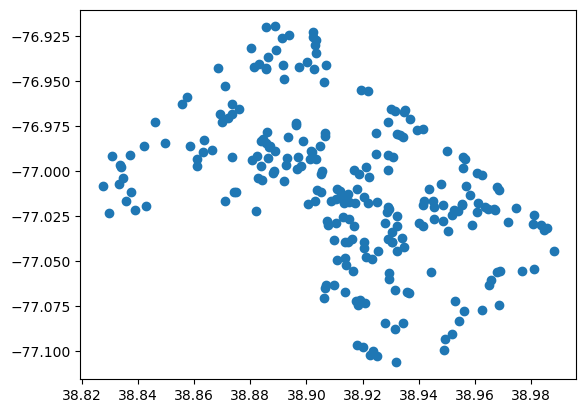

In [37]:
x = data['latitude']
y = data['longitude']
plt.scatter(x,y)
plt.show()

In [38]:
z = StandardScaler()
data[['latitude','longitude']] = z.fit_transform(data[['latitude','longitude']])

We cant necessarily tell how many clusters we can create from this. But to help us, we can use DBScan and different methods to determine the amount of clusters we need for a conclusive analysis.

In [39]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,min_samples=5)
clusters = dbscan.fit_predict(data)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


If we were to have values of -1, then we would define that as an outlier. What this basically mean is that, when we generalize all points to be within epsilon distance of at least 5 points, then with our specific epsilon, we can encapsulate all points with at least 5 points within epsilon distance. However, if we were to change our epsilon to something signifanctly smaller, we will have most definitely see some outliers, or some -1 from our dbscan.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


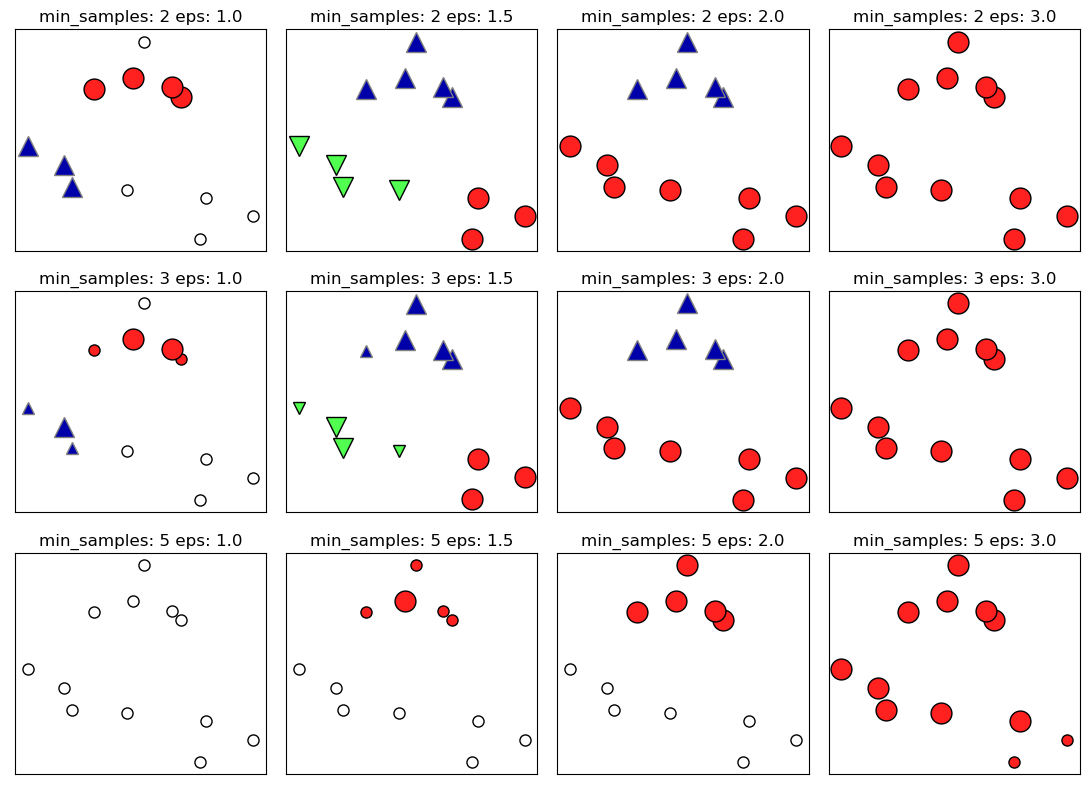

In [40]:
mglearn.plots.plot_dbscan()

From the above plot, we can see the amout of clusters that we create with different epsilons and min_samples. We notice that we get 3 pretty solid divided clusters with epsilon 1.5 and the minimum samples being 2 and 3. The others either simplify into 2 clusters or one big cluster. But we can further see if these are the appropriate amount of clusters, by using the Silhouette method.

In [41]:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(data))
def compare_clustering_algs(score_func, ref):
    """
    For all included clustering algorithms, get the socre by using 
    the score function *score_func* against the reference *ref*
    """
    
    # Make a list of algorithms to use
    algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

    # Set four sub figures for four approaches
    fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

    # First, we plot the random cluster assignment
    axes[0].scatter(data['latitude'], data['longitude'], c=random_clusters, cmap=mglearn.cm3, s=60)
    # The score function compares the groundtruth cluter ids in y and the clustering result
    axes[0].set_title("Random assignment: score={:.2f}".format(score_func(ref, random_clusters)))

    # Next, we plot the three clustering algorithms' result
    for ax, algorithm in zip(axes[1:], algorithms):
        # Plot the current algorithm's cluster assignment and cluster centers
        clusters = algorithm.fit_predict(data)
        ax.scatter(data['latitude'], data['longitude'], c=clusters, cmap=mglearn.cm3, s=60)
        ax.set_title("{}: score={:.2f}".format(algorithm.__class__.__name__, score_func(ref, clusters)))

In [42]:
# compare_clustering_algs(silhouette_score, data)
# fig = plt.gcf()
# fig.suptitle("Silhouette Score", 0.5, 1.05, fontsize=14)

## 5. Key-value stores (Lecture 9)

Exercise 1 from Lecture 9.

## 6. Deep learning Lecture 10

Train a deep neural network to predict if a passenger would survive or not in the Titanic dataset and remember to do train-test split as well as other necessary pre-processing dataset.

### Feature selection

We decide to use random forrest evaluation find the features that have the most influence towards survivability.

In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,U


In [44]:
features = titanic.columns.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Deck', 'Embarked', 'PassengerId'])
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [45]:
X = titanic[features]
y = titanic['Survived']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier

#criterion='entropy', max_features=5, n_estimators=100, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Accuracy of Random Forest: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of Random Forest: 0.8372093023255814


In [48]:
import numpy as np

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

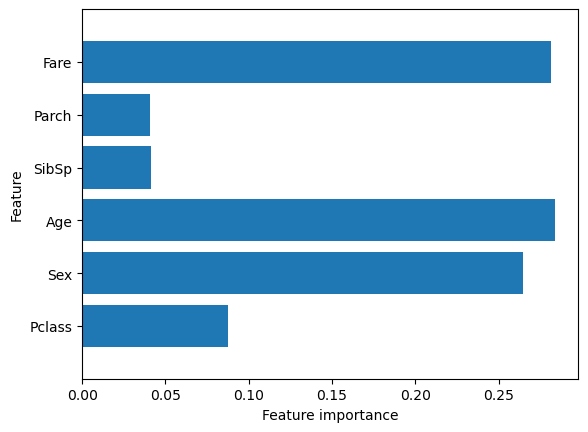

In [49]:
plot_feature_importances(forest, features)

This tells us that the features with most importance towards predicting survival is Fare, Sex and Age.

In [50]:
X = titanic[['Age', 'Fare', 'Sex']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
X_train = X_train.values.tolist()
X_train

[[24.0, 69.3, 1.0],
 [17.0, 7.125, 0.0],
 [34.0, 6.4958, 0.0],
 [18.0, 79.65, 1.0],
 [50.0, 106.425, 0.0],
 [27.0, 211.5, 0.0],
 [70.0, 71.0, 0.0],
 [20.0, 7.05, 0.0],
 [19.0, 14.5, 0.0],
 [1.0, 39.0, 0.0],
 [34.0, 21.0, 0.0],
 [63.0, 9.5875, 1.0],
 [20.0, 7.925, 0.0],
 [26.0, 18.7875, 0.0],
 [45.0, 26.55, 0.0],
 [33.0, 8.6542, 0.0],
 [45.0, 26.25, 1.0],
 [2.0, 26.0, 1.0],
 [50.0, 55.9, 0.0],
 [29.0, 21.075, 1.0],
 [22.0, 7.125, 0.0],
 [35.0, 53.1, 1.0],
 [39.0, 0.0, 0.0],
 [4.0, 16.7, 1.0],
 [17.0, 8.6625, 0.0],
 [0.42, 8.5167, 0.0],
 [1.0, 15.7417, 1.0],
 [32.0, 56.4958, 0.0],
 [51.0, 8.05, 0.0],
 [36.0, 26.0, 1.0],
 [36.0, 120.0, 0.0],
 [18.0, 6.75, 1.0],
 [0.75, 19.2583, 1.0],
 [18.0, 13.0, 1.0],
 [29.0, 7.75, 0.0],
 [36.0, 13.0, 1.0],
 [54.0, 51.8625, 0.0],
 [44.0, 90.0, 0.0],
 [65.0, 61.9792, 0.0],
 [42.0, 227.525, 1.0],
 [30.0, 24.0, 0.0],
 [39.0, 26.0, 0.0],
 [54.0, 78.2667, 1.0],
 [29.0, 27.7208, 0.0],
 [16.0, 10.5, 0.0],
 [55.0, 30.5, 0.0],
 [49.0, 76.7292, 1.0],
 [51.0, 77.9

In [53]:
X_test = X_test.values.tolist()

In [54]:
y_train

641    1
433    0
202    0
585    1
544    0
      ..
179    0
808    0
93     0
291    1
51     0
Name: Survived, Length: 499, dtype: int64

In [55]:
y_train_oh = [dl.one_hot_encode(y, 2) for y in y_train]
y_train_oh

[[0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],

In [56]:
y_test_oh = [dl.one_hot_encode(y, 2) for y in y_test]

In [57]:
import random
random.seed(0)
    
# Name them so we can turn train on and off
dropout1 = dl.Dropout(0.1)
dropout2 = dl.Dropout(0.1)
dropout3 = dl.Dropout(0.1)
    
t_model = dl.Sequential([
    dl.Linear(3, 32),  # Hidden layer 1: size 32
    dropout1,
    dl.Tanh(),
    dl.Linear(32, 16),   # Hidden layer 2: size 16
    dropout2,
    dl.Tanh(),
    dl.Linear(16, 8),   # Hidden layer 3: size 8
    dropout3,
    dl.Tanh(),
    dl.Linear(8, 2)    # Output layer: size 2
])

In [58]:
from numpy import argmax
import tqdm
def loop(model: dl.Layer,
             images: dl.List[dl.Tensor],
             labels: dl.List[dl.Tensor],
             loss: dl.Loss,
             optimizer: dl.Optimizer = None) -> None:
        correct = 0         # Track number of correct predictions.
        total_loss = 0.0    # Track total loss.
    
        with tqdm.trange(len(images)) as t:
            for i in t:
                predicted = model.forward(images[i])             # Predict.
                if argmax(predicted) == argmax(labels[i]):       # Check for
                    correct += 1                                 # correctness.
                total_loss += loss.loss(predicted, labels[i])    # Compute loss.
    
                # If we're training, backpropagate gradient and update weights.
                if optimizer is not None:
                    gradient = loss.gradient(predicted, labels[i])
                    model.backward(gradient)
                    optimizer.step(model)
    
                # And update our metrics in the progress bar.
                avg_loss = total_loss / (i + 1)
                acc = correct / (i + 1)
                t.set_description(f"mnist loss: {avg_loss:.3f} acc: {acc:.3f}")

In [59]:
from scratch.deep_learning import main
optimizer = dl.Momentum(learning_rate=0.01, momentum=0.99)
loss = dl.SoftmaxCrossEntropy()
    
# Enable dropout and train (takes > 20 minutes on my laptop!)
dropout1.train = dropout2.train = dropout3.train = True
loop(t_model, X_train, y_train_oh, loss, optimizer)

mnist loss: 0.675 acc: 0.587: 100%|██████████| 499/499 [00:00<00:00, 1064.85it/s]


In [60]:
# Disable dropout and evaluate
dropout1.train = dropout2.train = dropout3.train = False
loop(t_model, X_test, y_test_oh, loss)

mnist loss: 0.633 acc: 0.623: 100%|██████████| 215/215 [00:00<00:00, 1774.56it/s]


In [61]:
y_pred = [t_model.forward(x) for x in X_test]
y_pred

[[0.30002447136589044, 0.1555800142473189],
 [0.3103966983946365, 0.13230022522338208],
 [0.4369541046131727, -0.00454548363631066],
 [0.324797928102504, 0.12066359483963987],
 [0.48201227191616375, -0.06424555832049575],
 [0.5175036435453675, -0.09732614056127281],
 [0.4611638224402064, -0.03792938498402759],
 [0.5130388118694589, -0.09040517326177946],
 [0.5138789863556682, -0.0938641501121979],
 [0.4732423099555715, -0.05135622630135353],
 [0.39952516111384645, 0.039624993546725676],
 [0.4810745223010457, -0.06223095108585516],
 [0.525280822584933, -0.1054604667798385],
 [0.525190688724569, -0.10413298147772629],
 [0.5106143917399673, -0.09190190599427162],
 [0.3203381398048842, 0.11341492855737705],
 [0.47520702021575667, -0.05267252549005333],
 [0.4885995601049169, -0.07157751859537995],
 [0.5097995774323234, -0.09181374887068391],
 [0.5251157598610503, -0.10490057276156822],
 [0.4736807672640183, -0.05580037450040251],
 [0.5312934469548424, -0.10945671491032077],
 [0.307745237604

In [62]:
dl.softmax(y_pred)

[[0.5360484592050708, 0.4639515407949291],
 [0.5444068044012288, 0.45559319559877115],
 [0.6086162945414282, 0.3913837054585718],
 [0.5508571010644228, 0.44914289893557724],
 [0.6332669440127195, 0.36673305598728057],
 [0.6490417523361469, 0.35095824766385303],
 [0.6222462079286373, 0.3777537920713626],
 [0.6464438399128323, 0.3535561600871678],
 [0.6474258092699093, 0.3525741907300907],
 [0.6282224276491088, 0.3717775723508911],
 [0.5890162672270277, 0.4109837327729723],
 [0.6325810195094544, 0.36741898049054555],
 [0.6526575282999026, 0.3473424717000973],
 [0.6523360906526599, 0.34766390934734015],
 [0.6462317842669141, 0.35376821573308587],
 [0.5515470089820834, 0.44845299101791664],
 [0.6289884140278108, 0.37101158597218914],
 [0.6364935118858516, 0.3635064881141485],
 [0.6460253230629064, 0.35397467693709356],
 [0.6524931655561126, 0.3475068344438874],
 [0.6293620883934297, 0.37063791160657045],
 [0.6549230160293184, 0.3450769839706816],
 [0.5417880195620884, 0.45821198043791156],

In [63]:
y_pred_binary = [1 if x[1] > 0.5 else 0 for x in dl.softmax(y_pred)]
y_pred_binary

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [64]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_binary))

Accuracy: 0.6232558139534884
Recall: 0.0
Precision: 0.0
Confusion matrix:
[[134   0]
 [ 81   0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
optimizer = dl.Momentum(learning_rate=0.001, momentum=0.99)

dropout1.train = dropout2.train = dropout3.train = True

for _ in range(15):
    loop(t_model, X_train, y_train_oh, loss, optimizer)

mnist loss: 0.616 acc: 0.675: 100%|██████████| 499/499 [00:00<00:00, 1046.61it/s]


In [66]:
dropout1.train = dropout2.train = False
loop(t_model, X_test, y_test_oh, loss)

mnist loss: 0.595 acc: 0.702: 100%|██████████| 215/215 [00:00<00:00, 1769.55it/s]


In [67]:
y_pred = [t_model.forward(x) for x in X_test]
y_pred_binary = [1 if x[1] > 0.5 else 0 for x in dl.softmax(y_pred)]

In [68]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_binary))

Accuracy: 0.7116279069767442
Recall: 0.6049382716049383
Precision: 0.620253164556962
Confusion matrix:
[[104  30]
 [ 32  49]]


### Keras

In [69]:
from tensorflow import keras
from tensorflow.keras import layers

In [70]:
keras_model = keras.Sequential(
    [
        keras.Input(shape=(3)),  # As we have 3 columns in our input data X
        layers.Dense(32, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(16, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(8, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(2, activation="softmax")  # Here we specify that we want the last layer to have a softmax activation function
    ]
)

In [71]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1

In [72]:
keras_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
X_train_keras = np.array(X_train)
X_train_keras.shape

(499, 3)

In [74]:
y_train_keras = np.array(y_train_oh)
y_train_keras.shape

(499, 2)

In [75]:
keras_model.fit(X_train_keras, y_train_keras, batch_size=1, epochs=16)

Epoch 1/16
499/499 [==============================] - 1s 577us/step - loss: 0.6978 - accuracy: 0.5411
Epoch 2/16
499/499 [==============================] - 0s 547us/step - loss: 0.6199 - accuracy: 0.6633
Epoch 3/16
499/499 [==============================] - 0s 584us/step - loss: 0.6192 - accuracy: 0.6713
Epoch 4/16
499/499 [==============================] - 0s 547us/step - loss: 0.6014 - accuracy: 0.6854
Epoch 5/16
499/499 [==============================] - 0s 536us/step - loss: 0.5827 - accuracy: 0.7074
Epoch 6/16
499/499 [==============================] - 0s 541us/step - loss: 0.5585 - accuracy: 0.7315
Epoch 7/16
499/499 [==============================] - 0s 543us/step - loss: 0.5379 - accuracy: 0.7455
Epoch 8/16
499/499 [==============================] - 0s 538us/step - loss: 0.5296 - accuracy: 0.7455
Epoch 9/16
499/499 [==============================] - 0s 538us/step - loss: 0.5386 - accuracy: 0.7495
Epoch 10/16
499/499 [==============================] - 0s 558us/step - loss: 0.528

In [76]:
score = keras_model.evaluate(np.array(X_test), np.array(y_test_oh), verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.49285146594047546
Test accuracy: 0.7860465049743652


In [77]:
y_pred_keras = keras_model.predict(np.array(X_test))
y_pred_keras

7/7 [==============================] - 0s 587us/step


array([[0.20407683, 0.79592323],
       [0.6032092 , 0.3967909 ],
       [0.2559149 , 0.74408513],
       [0.16248919, 0.8375108 ],
       [0.878886  , 0.12111399],
       [0.88156873, 0.11843129],
       [0.25916246, 0.74083745],
       [0.88449883, 0.11550119],
       [0.8813508 , 0.11864916],
       [0.878653  , 0.12134705],
       [0.77119166, 0.22880836],
       [0.8791485 , 0.12085148],
       [0.8825436 , 0.11745634],
       [0.8823696 , 0.11763048],
       [0.8805903 , 0.11940972],
       [0.54558724, 0.45441276],
       [0.8791789 , 0.1208211 ],
       [0.878967  , 0.121033  ],
       [0.88030756, 0.1196925 ],
       [0.8823591 , 0.11764091],
       [0.87814844, 0.12185153],
       [0.8838153 , 0.11618475],
       [0.58026403, 0.419736  ],
       [0.88459134, 0.11540866],
       [0.88001883, 0.11998113],
       [0.8811242 , 0.11887584],
       [0.88267726, 0.11732279],
       [0.26571682, 0.73428315],
       [0.523171  , 0.47682896],
       [0.8773736 , 0.12262645],
       [0.

In [78]:
y_pred_keras_binary = [1 if x[1] > 0.5 else 0 for x in y_pred_keras]
y_pred_keras_binary

[1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1]

In [79]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_keras_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_keras_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_keras_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_keras_binary))

Accuracy: 0.786046511627907
Recall: 0.7283950617283951
Precision: 0.7108433734939759
Confusion matrix:
[[110  24]
 [ 22  59]]


## 7. MapReduce (Lecture 13)

All exercises from Lecture 13.

## 8. Time Series Analysis (Lecture 14 & 15)

Do a time series analysis of the Copenhagen ice cream dataset ("cph_ice_cream_searches.csv") from Lectures 14 and 15.

## 9. IoT (Lecture 17)

All exercises from Lecture 17.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv('data/diabetes.csv')

In [103]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


So now we have the data. Next we do is choose our features. We do this by dropping the other columns that we dont want. We also drop the Outcome feature, since it's our class label.

In [104]:
features = data.columns.drop(['Pregnancies','SkinThickness','BMI','DiabetesPedigreeFunction','Age','Outcome'])
features

Index(['Glucose', 'BloodPressure', 'Insulin'], dtype='object')

Now we can define our x and y for the data.

In [105]:
x = data[features]
y = data['Outcome']
print(x,y)

     Glucose  BloodPressure  Insulin
0        148             72        0
1         85             66        0
2        183             64        0
3         89             66       94
4        137             40      168
..       ...            ...      ...
763      101             76      180
764      122             70        0
765      121             72      112
766      126             60        0
767       93             70        0

[768 rows x 3 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


The next exercise, is to Normalize our features to between [0,1] using MinMax scaling. The MinMax datascaling works by subtracting the minimum value in the feature and then divides by the range. Where the range is the difference between the original maximum and original minimum. So if the max is 5 and the minimum is 1, and we have the value 3. Then we say (3-1)/4=0.5. What this does, is ensuring that all of our data is scaled between 0 and 1, which is an easier way to represent outlier data and show it compared to the mean.

In [106]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler(feature_range=(0,1))
X_scaled = pd.DataFrame(minMaxScaler.fit_transform(x), columns = x.columns)
X_scaled.describe()

,Glucose,BloodPressure,Insulin
count,768.000000,768.000000,768.000000
mean,0.607510,0.566438,0.094326
std,0.160666,0.158654,0.136222
min,0.000000,0.000000,0.000000
25%,0.497487,0.508197,0.000000
50%,0.587940,0.590164,0.036052
75%,0.704774,0.655738,0.150414
max,1.000000,1.000000,1.000000


In [107]:
X_scaled

,Glucose,BloodPressure,Insulin
0,0.743719,0.590164,0.000000
1,0.427136,0.540984,0.000000
2,0.919598,0.524590,0.000000
3,0.447236,0.540984,0.111111
4,0.688442,0.327869,0.198582
...,...,...,...
763,0.507538,0.622951,0.212766
764,0.613065,0.573770,0.000000
765,0.608040,0.590164,0.132388
766,0.633166,0.491803,0.000000


We have now normalized our data. The next exercise involves saving the scaled data into another dataset. So firstly we change y to being a dataframe, and then we concatenate them.

In [108]:
yf = pd.DataFrame(y, columns=['Outcome'])
S = pd.concat([X_scaled,y], axis=1)
S

,Glucose,BloodPressure,Insulin,Outcome
0,0.743719,0.590164,0.000000,1
1,0.427136,0.540984,0.000000,0
2,0.919598,0.524590,0.000000,1
3,0.447236,0.540984,0.111111,0
4,0.688442,0.327869,0.198582,1
...,...,...,...,...
763,0.507538,0.622951,0.212766,0
764,0.613065,0.573770,0.000000,0
765,0.608040,0.590164,0.132388,0
766,0.633166,0.491803,0.000000,1


In [109]:
features = S.columns.drop('Outcome')
features

Index(['Glucose', 'BloodPressure', 'Insulin'], dtype='object')

In [110]:
X = S[features]

In [111]:
X= X[:100]
X

,Glucose,BloodPressure,Insulin
0,0.743719,0.590164,0.000000
1,0.427136,0.540984,0.000000
2,0.919598,0.524590,0.000000
3,0.447236,0.540984,0.111111
4,0.688442,0.327869,0.198582
...,...,...,...
95,0.723618,0.590164,0.269504
96,0.462312,0.508197,0.000000
97,0.356784,0.393443,0.089835
98,0.467337,0.409836,0.075650


In [112]:
y = S[['Outcome']]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [113]:
y = y[:100]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
95,0
96,0
97,0
98,0


This next exercise is regarding MQTT (Message Queue Telemetry Transport). It's a standard messaging protocol for IoT. Before sending or recieving a message, a client must first connect to a server. So we make both a broker and a client. The description of the exercise is: "The subscriber continuously receives the data. For each latest record r received, apply the 
3NN classification to the last 5 records before r, and compare the classification result with the 
Outcome label in r". But first, I will make a training.

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [115]:
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()

Now we have our training, then we can set up our broker and subscriber.

In [116]:
import logging
import time
import paho.mqtt.client as mqtt
# We create a client as the data subscriber and specify its actions for particular events
mqttc = mqtt.Client()

# Now, we connect to the data broker.
mqttc.connect("mqtt.eclipseprojects.io", 1883, 60)

if __name__ == "__main__":
    print("Publishing...")
    
    index = 0
    while (index >= 0):
        # Get the current data reading to send out
        data = X_train[index][0]
        print(data)
       
        # Publish the data reading as 'Diabetes/Glucose'
        mqttc.publish("Glucose", str(data))
        # We send the next reading after 2 seconds
        time.sleep(0.2)
        if index == len(X_train) -1:
            index = -1
        else:
            index = index + 1

# This function defines what to do when we connect to the broker
def on_connect(client, userdata, flags, rc):
    print("Connected with result code " + str(rc))
    # We subscribe to this particular data. There may be other data published by the same subscriber or broker.
    client.subscribe("Glucose")

# This function defines what to do when we receives a message from the brokder
def on_message(client, userdata, msg):
    print("Received Glucose: ", msg.payload.decode())
    global current_glucose
    current_glucose = msg.payload.decode()
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print(f'prediction {y_pred}: real {y_test}')

# We create a client as the data subscriber and specify its actions for particular events
mqttc = mqtt.Client()
mqttc.on_connect = on_connect
mqttc.on_message = on_message

# Now, we connect to the data broker.
mqttc.connect("mqtt.eclipseprojects.io", 1883, 60)
# As a simple example, we just keep the data listening/receiving on and on...
mqttc.loop_start()

Publishing...
0.4221105527638191
Received Glucose:  0.4221105527638191


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5678391959798995
Received Glucose:  0.5678391959798995
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.4020100502512563
Received Glucose:  0.4020100502512563
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.47738693467336685


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.47738693467336685
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.507537688442211
Received Glucose:  0.507537688442211
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.48743718592964824
Received Glucose:  0.48743718592964824
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.5175879396984925
Received Glucose:  0.5175879396984925
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.9396984924623115
Received Glucose:  0.9396984924623115
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.7085427135678392
Received Glucose:  0.7085427135678392
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.3969849246231156


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Received Glucose:  0.3969849246231156
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.4271356783919598
Received Glucose:  0.4271356783919598
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.

0.6683417085427136
Received Glucose:  0.6683417085427136
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5326633165829145


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.5326633165829145
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.6683417085427136
Received Glucose:  0.6683417085427136
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.6884422110552764
Received Glucose:  0.6884422110552764
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5025125628140703


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.5025125628140703
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5376884422110553
Received Glucose:  0.5376884422110553
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.9045226130653267
Received Glucose:  0.9045226130653267
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.45226130653266333


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.45226130653266333
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5829145728643216
Received Glucose:  0.5829145728643216
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.6180904522613065
Received Glucose:  0.6180904522613065
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5276381909547738


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.5276381909547738
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.7437185929648241


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.7437185929648241
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.6130653266331658


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.6130653266331658
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.7286432160804021


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.7286432160804021
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5175879396984925
Received Glucose:  0.5175879396984925
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.8442211055276382
Received Glucose:  0.8442211055276382
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5175879396984925


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.5175879396984925
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5979899497487438
Received Glucose:  0.5979899497487438
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.44221105527638194
Received Glucose:  0.44221105527638194
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5527638190954774


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.5527638190954774
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.7939698492462312
Received Glucose:  0.7939698492462312
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.5477386934673367
Received Glucose:  0.5477386934673367
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5025125628140703


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.5025125628140703
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5628140703517588
Received Glucose:  0.5628140703517588
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.5527638190954774
Received Glucose:  0.5527638190954774
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.44221105527638194
Received Glucose:  0.44221105527638194
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.6884422110552764
Received Glucose:  0.6884422110552764
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.8341708542713568
Received Glucose:  0.8341708542713568
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.5376884422110553
Received Glucose:  0.5376884422110553
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.577889447236181
Received Glucose:  0.577889447236181
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.5879396984924623
Received Glucose:  0.5879396984924623
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5276381909547738


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.5276381909547738
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.35678391959798994
Received Glucose:  0.35678391959798994
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.46733668341708545
Received Glucose:  0.46733668341708545
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.7336683417085427


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.7336683417085427
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.6331658291457286
Received Glucose:  0.6331658291457286
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.7135678391959799
Received Glucose:  0.7135678391959799
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.6331658291457286


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.6331658291457286
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.47738693467336685
Received Glucose:  0.47738693467336685
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.628140703517588
Received Glucose:  0.628140703517588
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.5125628140703518
Received Glucose:  0.5125628140703518
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.37185929648241206
Received Glucose:  0.37185929648241206
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.7336683417085427
Received Glucose:  0.7336683417085427
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.5577889447236181
Received Glucose:  0.5577889447236181
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.49748743718592964
Received Glucose:  0.49748743718592964
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.7336683417085427
Received Glucose:  0.7336683417085427
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.6984924623115578
Received Glucose:  0.6984924623115578
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.6834170854271356
Received Glucose:  0.6834170854271356
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5025125628140703
Received Glucose:  0.5025125628140703
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.5025125628140703
Received Glucose:  0.5025125628140703
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.6934673366834171


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.6934673366834171
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.49748743718592964
Received Glucose:  0.49748743718592964
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.507537688442211
Received Glucose:  0.507537688442211
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.628140703517588


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.628140703517588
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.4623115577889447
Received Glucose:  0.4623115577889447
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.5477386934673367
Received Glucose:  0.5477386934673367
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.5728643216080402


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Received Glucose:  0.5728643216080402
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]
0.35678391959798994
Received Glucose:  0.35678391959798994
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Us

0.7989949748743719
Received Glucose:  0.7989949748743719
prediction [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]: real [[1], [0], [1], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [117]:
import dash
from dash import html, dcc, Input, Output

import dash_bootstrap_components as dbc
import paho.mqtt.client as mqtt

global current_glucose


In [118]:
# -----------------------------------------------------------------------------
# Defining Dash app
# -----------------------------------------------------------------------------
app = dash.Dash(external_stylesheets=[dbc.themes.DARKLY])

# -----------------------------------------------------------------------------
# Glucose card
# -----------------------------------------------------------------------------
card = dbc.Card(
    html.H4(id="Glucose")
)

Connected with result code 0


In [119]:
# -----------------------------------------------------------------------------
# Application layout
# -----------------------------------------------------------------------------
app.layout = dbc.Container(
    [
        dcc.Interval(id='update', n_intervals=0, interval=1000*3),
        html.H1("Monitoring IoT Sensor Data with Plotly Dash"),
        html.Hr(),
        dbc.Row(dbc.Col(card, lg=4))
    ]
)

In [120]:
# -----------------------------------------------------------------------------
# Callback for updating Glucose data
# -----------------------------------------------------------------------------
@app.callback(
    Output('Glucose', 'children'),
    Input('update', 'n_intervals')
)

def update_glucose(timer):
    return ("Glucose: " + str(current_glucose) + " at time " + str(timer))

In [121]:
# -----------------------------------------------------------------------------
# Main function
# -----------------------------------------------------------------------------
if __name__ == "__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Mar/2023 13:28:07] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:08] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:11] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:14] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:17] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:20] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:20] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:22] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Mar/2023 13:28:25] "POST /_dash-update-component